In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

import warnings
import os
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('creditcard.csv')

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [20]:
df.rename(columns={'Class': 'Fraud'}, inplace=True)

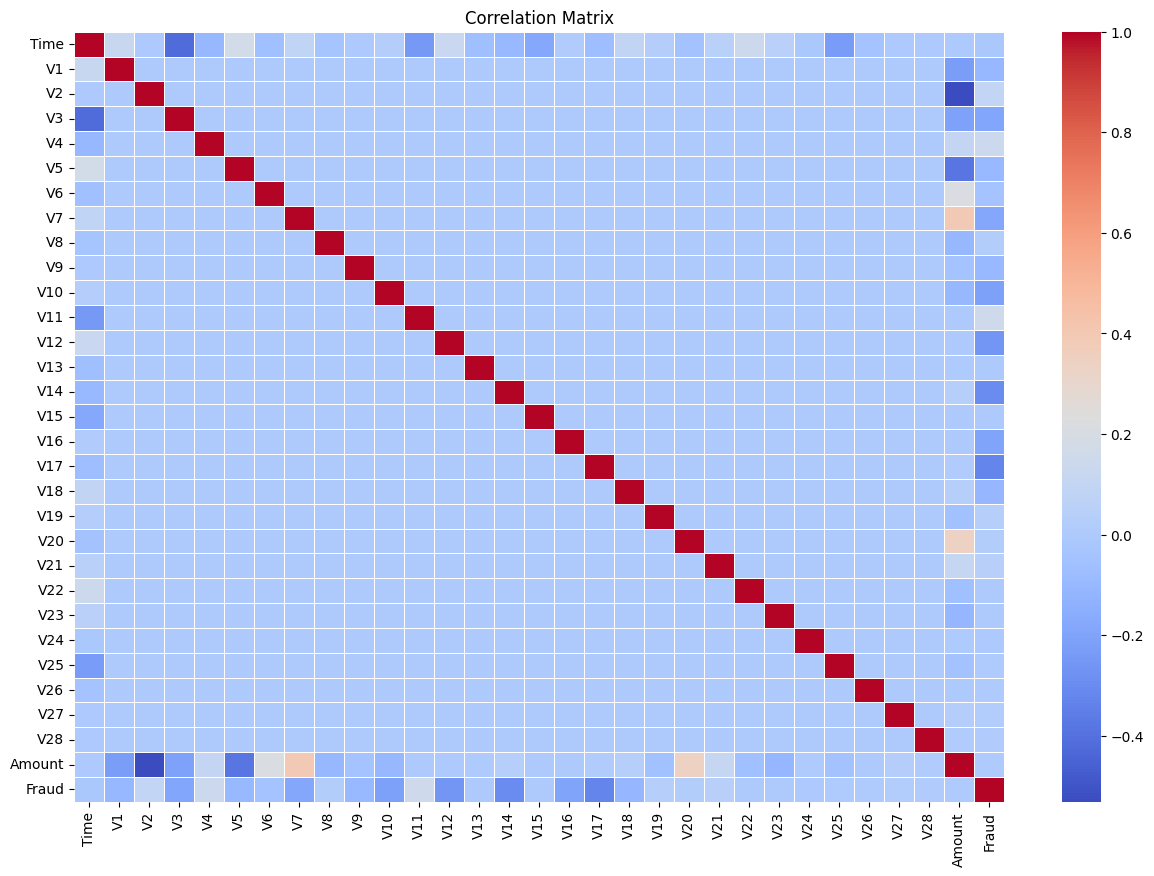

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

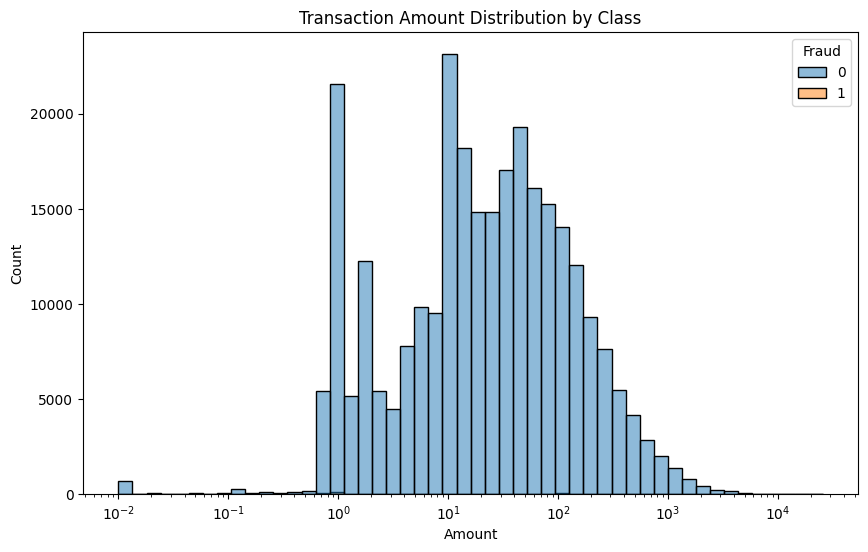

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Fraud', bins=50, log_scale=True)
plt.title('Transaction Amount Distribution by Class')
plt.show()

In [48]:
df['Time_Hour'] = df['Time'] // 3600
df['Tx_Frequency'] = df.groupby('Time_Hour')['Time'].transform('count')

In [49]:
df['Avg_Amount'] = df.groupby('Time_Hour')['Amount'].transform('mean')
df['Amount_Deviation'] = df['Amount'] - df['Avg_Amount']

In [50]:
df['Is_Night'] = ((df['Time'] % 86400) // 3600).isin([0, 1, 2, 3, 4, 5]).astype(int)


In [51]:
df = df.drop(['Time_Hour', 'Avg_Amount'], axis=1)

In [52]:
X = df.drop(['Fraud', 'Time'], axis=1)
y = df['Fraud']

In [53]:
scaler = StandardScaler()
X[['Amount', 'Tx_Frequency', 'Amount_Deviation']] = scaler.fit_transform(
    X[['Amount', 'Tx_Frequency', 'Amount_Deviation']]
)

In [54]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
subset_idx = np.random.choice(X_train[y_train == 0].index, size=10000, replace=False)
X_train_subset = pd.concat([X_train.loc[subset_idx], X_train[y_train == 1]], axis=0)
y_train_subset = pd.concat([y_train.loc[subset_idx], y_train[y_train == 1]], axis=0)

In [56]:
print("Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})


In [57]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("After RandomUnderSampler:", Counter(y_train_rus))

After RandomUnderSampler: Counter({0: 394, 1: 394})


In [60]:
## model evalutor function
def model_evaluator(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Classification Report:\n", report)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.xticks([0, 1], ['Legit', 'Fraud'])
    plt.yticks([0, 1], ['Legit', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    # Precision-Recall Curve
    if y_pred_proba is not None:
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        plt.plot(recall, precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.show()
        # Threshold Tuning
        optimal_idx = np.argmax(precision * recall)
        optimal_threshold = thresholds[optimal_idx]
        y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)
        print(f"Optimal Threshold: {optimal_threshold:.4f}")
        print("Adjusted Classification Report:\n", classification_report(y_test, y_pred_adjusted))

    return model


LogisticRegression Results:
ROC AUC Score: 0.9359
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.90      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



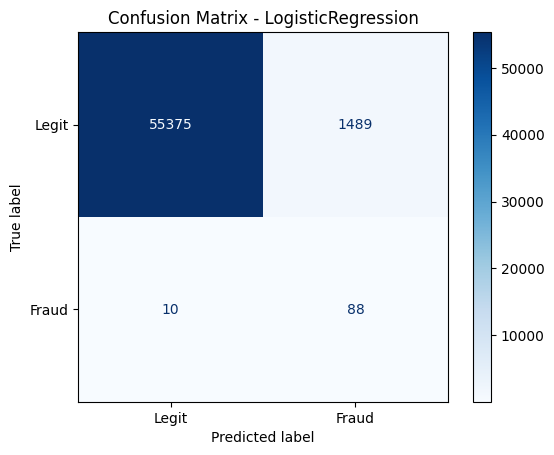

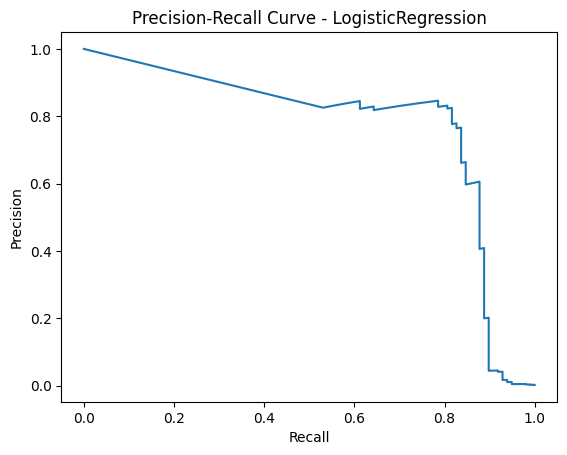

Optimal Threshold: 1.0000
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [61]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr_model = model_evaluator(lr, X_train_smote, X_test, y_train_smote, y_test, 'LogisticRegression')


RandomForest Results:
ROC AUC Score: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.91      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962



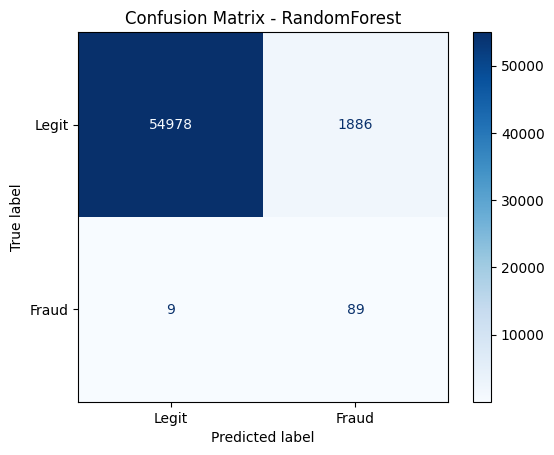

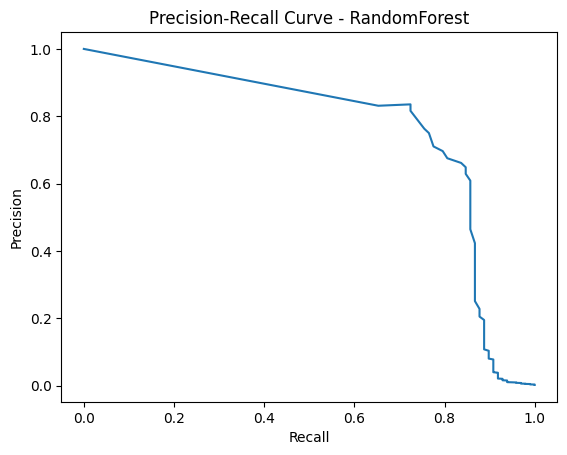

Optimal Threshold: 0.9900
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [62]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model = model_evaluator(rf, X_train_rus, X_test, y_train_rus, y_test, 'RandomForest')


XGBoost Results:
ROC AUC Score: 0.9132
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



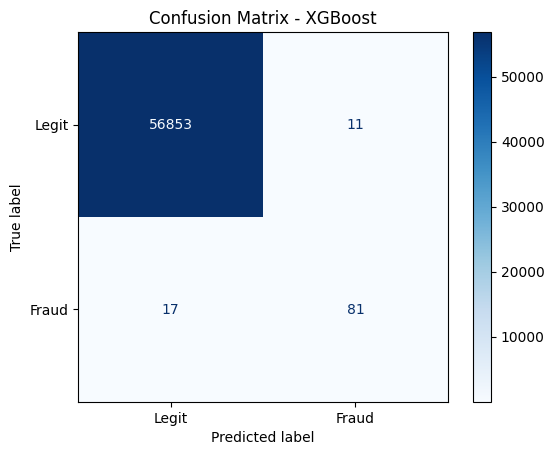

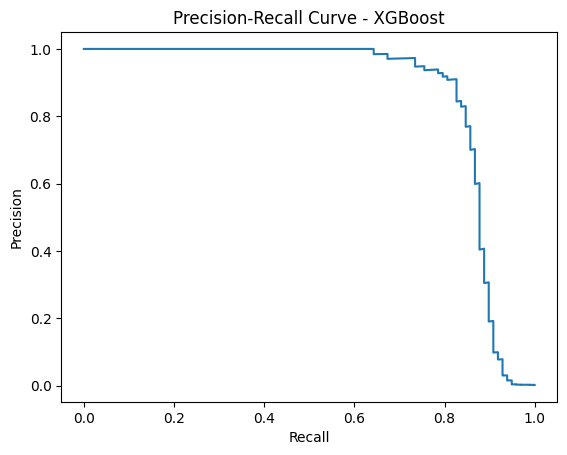

Optimal Threshold: 0.7289
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [63]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)
xgb_model = model_evaluator(xgb, X_train, X_test, y_train, y_test, 'XGBoost')

In [64]:
# Hyperparameter tuning 
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': np.logspace(-2, -0.5, 10),
    'max_depth': np.arange(3, 10),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'min_child_weight': np.arange(1, 10),
    'gamma': np.arange(0, 0.5, 0.1)
}

search = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_distributions=param_dist,
    n_iter=20, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1
)
search.fit(X_train_smote, y_train_smote)
print("\nBest Parameters:", search.best_params_)
print("Best ROC AUC Score:", search.best_score_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits



Best Parameters: {'subsample': 0.5, 'n_estimators': 350, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.31622776601683794, 'gamma': 0.30000000000000004}
Best ROC AUC Score: 0.9999932789309485


In [40]:
best_model = search.best_estimator_

Model Training and Evaluation

ROC AUC Score:  0.9335064041091957
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.87      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



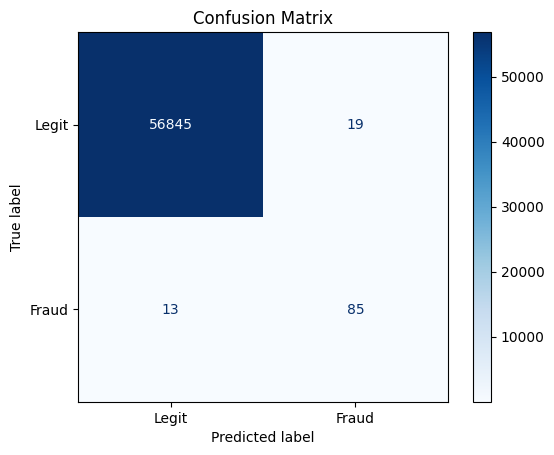

In [41]:
model_evaluator(best_model, X_train_smote, X_test, y_train_smote, y_test)

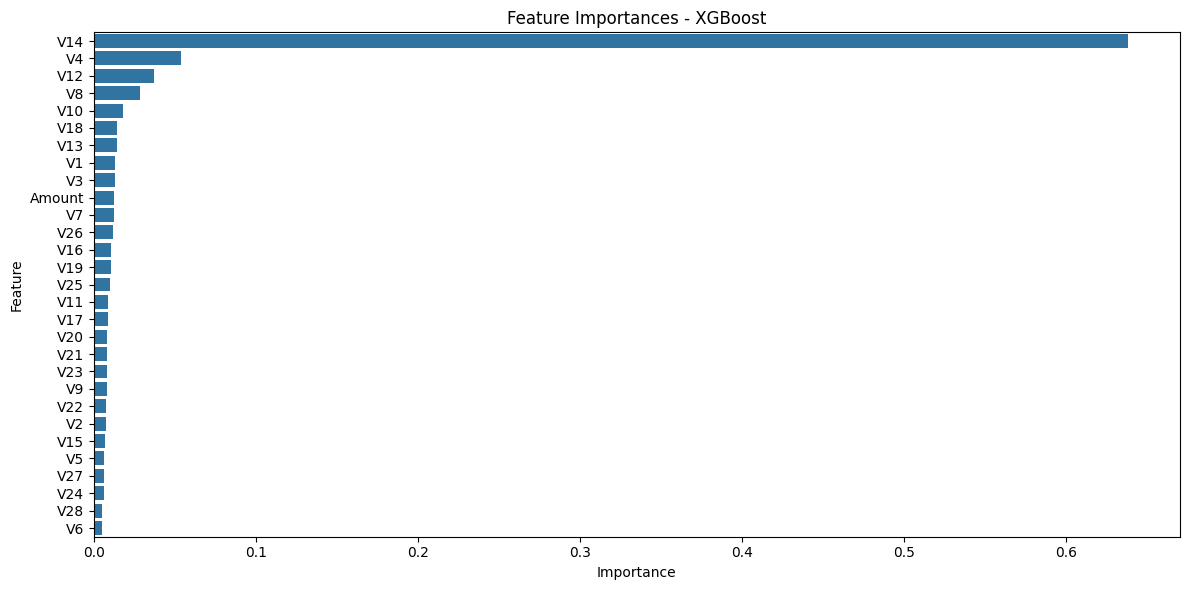

In [42]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
})
importance = importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

In [68]:
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
print(f"\nCross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation ROC AUC: 1.0000 ± 0.0000
